In [76]:
import pandas as pd

In [77]:
df=pd.read_csv("Data/ml practice.csv")
df

,f1,f2,f3,f4
0,1,5,0,1
1,2,7,0,1
2,3,8,0,1
3,4,9,0,1


In [78]:
df.var()

f1    1.666667
f2    2.916667
f3    0.000000
f4    0.000000
dtype: float64

# Variance thresholding

In [79]:
from sklearn.feature_selection import VarianceThreshold

In [80]:
vart= VarianceThreshold(threshold=0)

In [81]:
vart.fit(df)

VarianceThreshold(threshold=0)

In [82]:
vart.get_support()

array([ True,  True, False, False])

In [83]:
df.columns[vart.get_support()]

Index(['f1', 'f2'], dtype='object')

# Feature selection using correlation

In [84]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df2= load_boston()
x=pd.DataFrame(df2.data, columns=df2.feature_names)#name= independent variable
y=df2.target # target = dependent variable

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((354, 13), (152, 13))

In [98]:
x_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


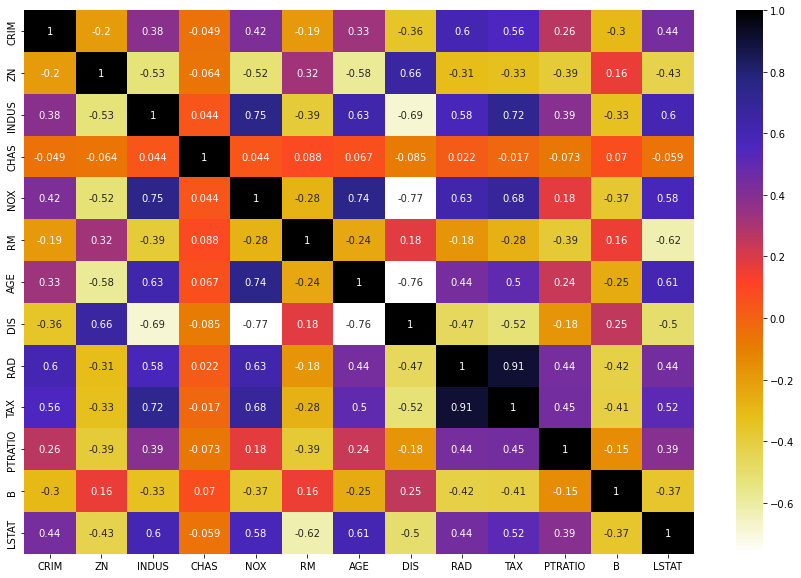

In [99]:
import seaborn as sns
plt.figure(figsize=(15,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [100]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline
df3= load_diabetes()
x=pd.DataFrame(df3.data, columns=df3.feature_names)#name= independent variable
y=df3.target # target = dependent variable


In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((309, 10), (133, 10))

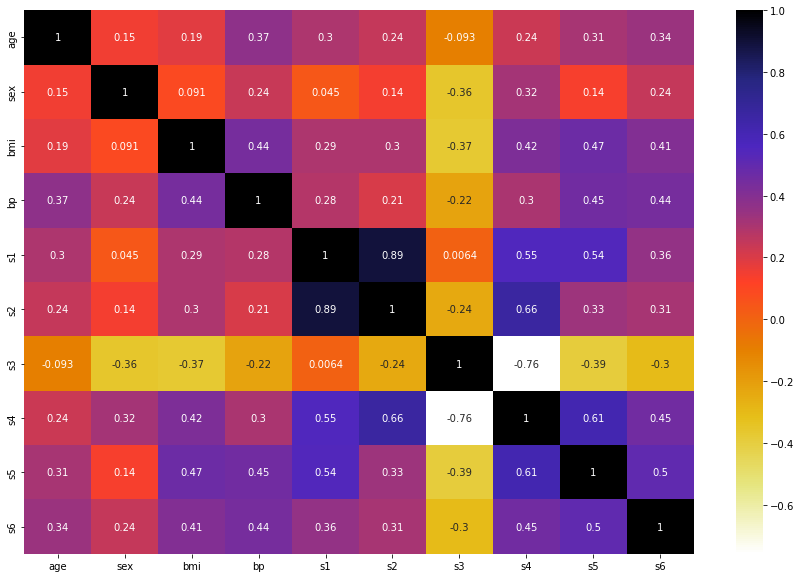

In [102]:
import seaborn as sns
plt.figure(figsize=(15,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [103]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr   

In [104]:
corr_f=correlation(x_train,0.7)
len(set(corr_f))

2

In [105]:
corr_f

{'s2', 's4'}

In [106]:
x_train.drop(corr_f,axis=1)
x_test.drop(corr_f,axis=1)

,age,sex,bmi,bp,s1,s3,s5,s6
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.024993,0.003712,0.040343
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,-0.017629,0.070211,0.007207
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.039719,-0.018118,0.007207
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,-0.017629,-0.038459,-0.038357
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,0.070730,-0.034524,-0.009362
...,...,...,...,...,...,...,...,...
328,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.010266,-0.001499,0.019633
414,0.081666,0.050680,0.006728,-0.004523,0.109883,-0.032356,0.054724,0.007207
421,0.038076,0.050680,0.016428,0.021872,0.039710,-0.043401,0.049769,0.015491
361,0.041708,-0.044642,-0.007284,0.028758,-0.042848,0.052322,-0.072128,0.023775
